# Baseball Project Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Exploratory Data Analysis


In [5]:
df.shape

(30, 17)

In [6]:
df.dtypes


W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
df.columns


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
# Checking null values in the dataframe
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [10]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [11]:
df.skew()


W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [12]:
# Creating correlation matrix
cor = df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


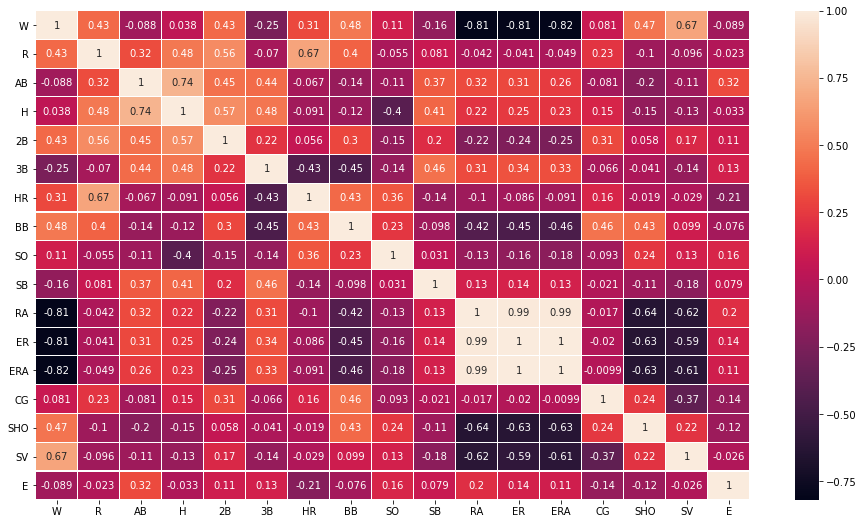

In [13]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

In [14]:
df_new=df[df.columns]

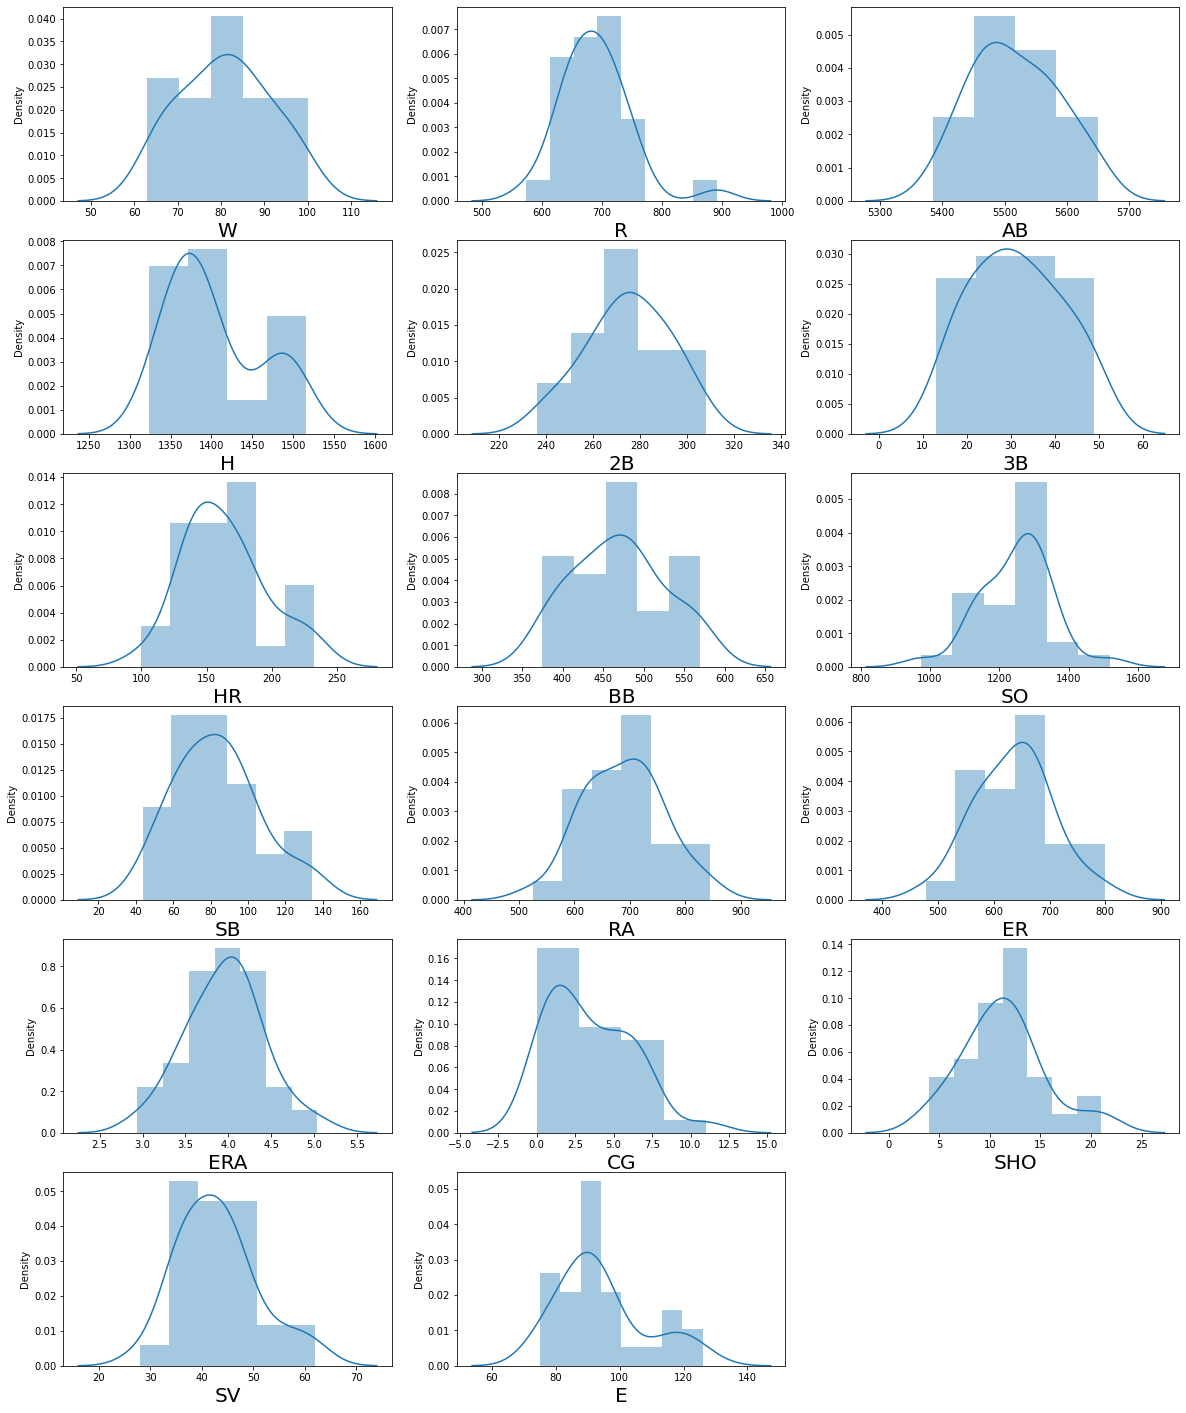

In [15]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Removing outliers


In [16]:
features = ["R","H","HR","CG","SHO","SV","E"]

In [17]:
# removing outliers by Zscore
from scipy.stats import zscore
z=np.abs(zscore(df[features]))
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [18]:
df.shape

(30, 17)

In [19]:
df_new.shape

(29, 17)

The new dataframe contains 29 rows and 17 columns after removing the outliers.



In [20]:
# Let's check the the data loss
data_loss = (30-29)/30*100
data_loss

3.3333333333333335

3.333 % loss which is less than 5% so we will use Zscore methode


# Checking skewness


In [21]:
df_new.skew()


W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

columns H,CG,SHO,SV,E skewed and these columns are not in the acceptable range +0.5 or -0.5. 
so we will remove the skewness from H,CG,SHO,SV,E feature sing yeo-johnson method

# Removing skewness using yeo-johnson method


In [22]:
# Defining skewed columns 
features1 = ["H","CG","SHO","SV","E"]

In [23]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [24]:
df_new[features1] = scaler.fit_transform(df_new[features1].values)


In [25]:
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,0.0,300,42,139,383,973,104,641,601,3.73,-0.307098,-0.787002,1.532753,-0.348265
1,83,696,5467,0.0,277,44,156,439,1264,70,700,653,4.07,-0.307098,0.236737,0.312020,-0.540820
2,81,669,5439,0.0,303,29,141,533,1157,86,640,584,3.67,2.011315,-0.252844,-0.664137,-1.326125
3,76,622,5533,0.0,260,27,136,404,1231,68,701,643,3.98,1.264463,-0.513555,-0.820689,0.650818
4,74,689,5605,0.0,289,49,151,455,1259,83,803,746,4.64,1.264463,0.236737,-1.149165,-0.540820
6,87,764,5567,0.0,272,19,212,554,1227,63,698,652,4.03,0.121871,-2.064039,0.677176,0.082858
7,81,713,5485,0.0,246,20,217,418,1331,44,693,646,4.05,-1.732896,-0.252844,0.052325,-1.588197
8,80,644,5485,0.0,278,32,167,436,1310,87,642,604,3.74,-0.870682,0.236737,1.908137,0.237592
9,78,748,5640,0.0,294,33,161,478,1148,71,753,694,4.31,0.121871,-0.252844,-0.365006,0.383386
10,88,751,5511,0.0,279,32,172,503,1233,101,733,680,4.24,0.770649,-0.513555,0.312020,1.554265


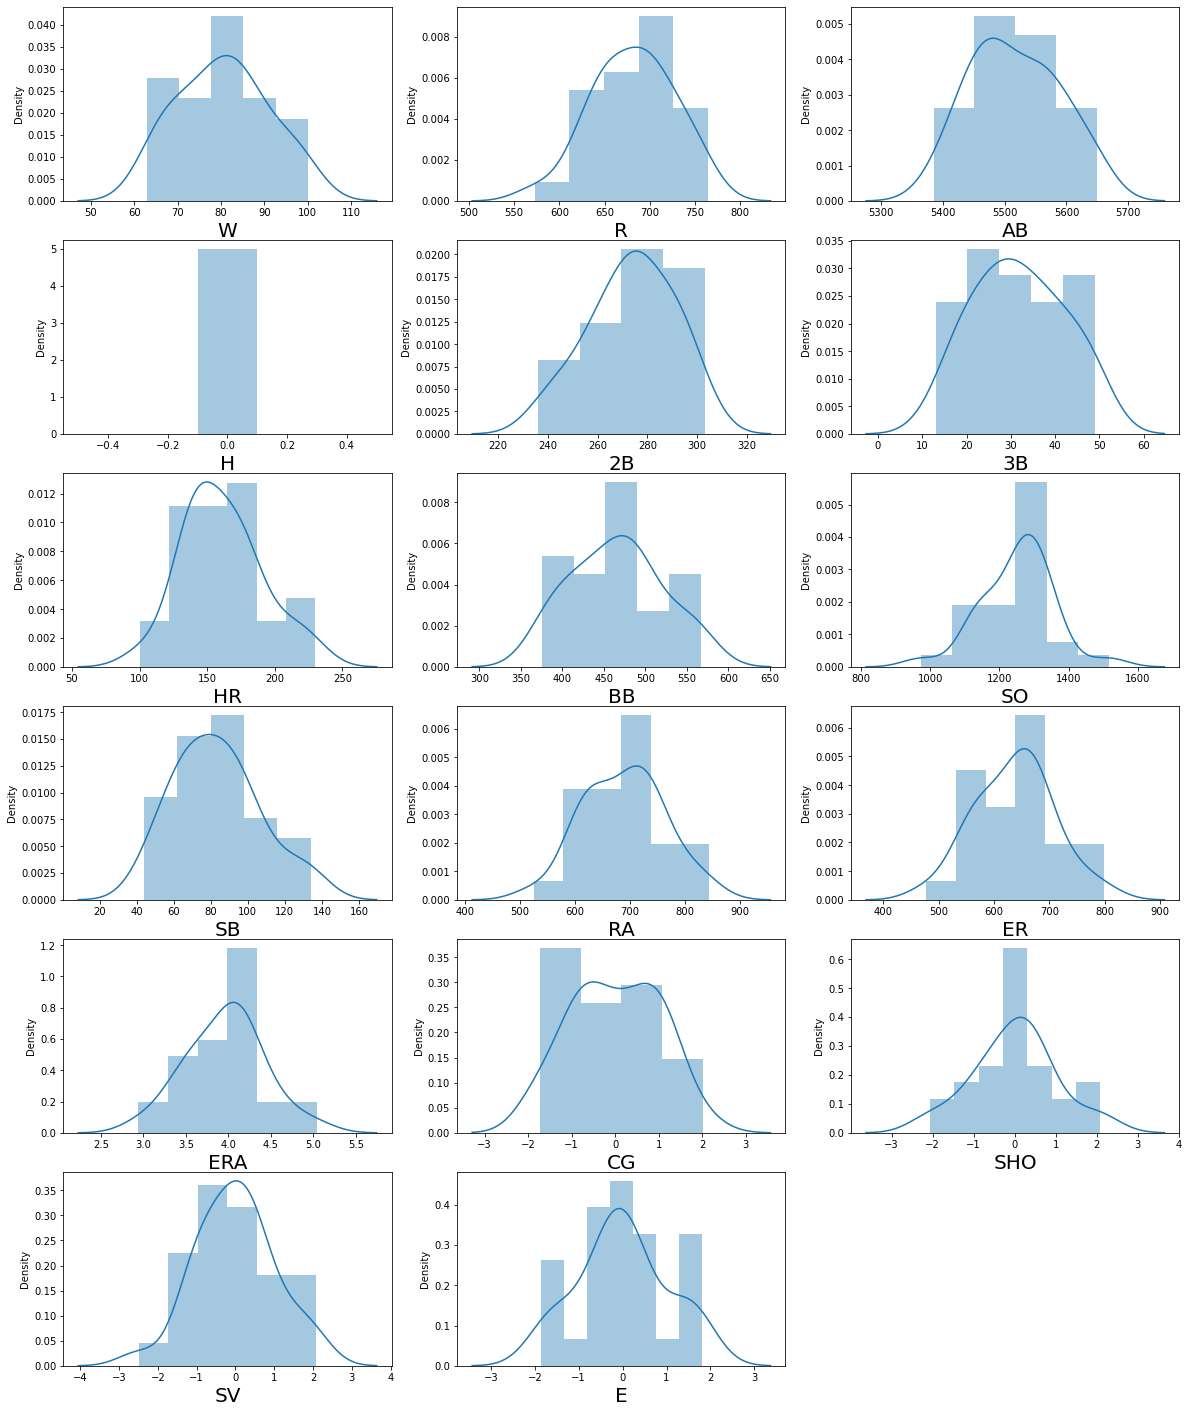

In [26]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [27]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

# Model Preparation

In [28]:
x = df_new.drop("W",axis=1)
y = df_new["W"]

# Standard scaler¶


In [29]:
from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()
x = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [30]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,0.0,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.0,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,0.0,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,0.0,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.0,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,0.0,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,0.0,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.0,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,0.0,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.0,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.770649,-0.513555,0.312020,1.554265


# Creating train test split

Importing some neccessary libraries 


In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Checking for best random state which give best r2 score for various training techniques used to get best prediction
Defining a function to check for best random state and r2 score.

In [32]:
def Findr2_score(tec,x,y):
    max_r_score=0
    for r_state in range(10,100):
        train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        tec.fit(train_x,train_y)
        pred = tec.predict(test_x)
        temp=r2_score(test_y,pred)
        if temp>max_r_score:
            max_r_score=temp
            final_r_state=r_state
    mse = mean_squared_error(test_y,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_y,pred)
    print("max r2 score : ",max_r_score, 'its random state: ',final_r_state,)
    print("MSE :", mse)  
    print("MAE :", mae)
    print("RMSE :", rmse)    

In [33]:
#Importing various methods from libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

Model with LinearRegression


In [34]:
LR=LinearRegression()
Findr2_score(LR,x,y)

max r2 score :  0.9309471135252984 its random state:  99
MSE : 10.53440145886282
MAE : 2.6499075271613677
RMSE : 3.2456742687556956


Model with Decision Tree Regressor

In [35]:
DT=DecisionTreeRegressor()
Findr2_score(DT,x,y)

max r2 score :  0.8651196519216824 its random state:  65
MSE : 92.0
MAE : 8.333333333333334
RMSE : 9.591663046625438


Model with KNeighborsRegressor


In [36]:
KN=KNeighborsRegressor()
Findr2_score(KN,x,y)

max r2 score :  0.8324422110552764 its random state:  51
MSE : 37.25333333333332
MAE : 5.733333333333334
RMSE : 6.103550879064851


Model with RandomForestRegressor


In [37]:
RF=RandomForestRegressor()
Findr2_score(RF,x,y)

max r2 score :  0.7529839517625234 its random state:  94
MSE : 51.04128333333338
MAE : 6.3350000000000035
RMSE : 7.144318255322434


Model with Adaboost Regressor

In [38]:
AB=AdaBoostRegressor()
Findr2_score(AB,x,y)

max r2 score :  0.8611628203774118 its random state:  64
MSE : 42.09796296296299
MAE : 6.094444444444446
RMSE : 6.488294303047835


Model with GradientBoost Regressor

In [39]:
GB=GradientBoostingRegressor()
Findr2_score(GB,x,y)

max r2 score :  0.906303666290792 its random state:  11
MSE : 39.2782096245622
MAE : 5.461294217101222
RMSE : 6.26723301182924


Lasso and Ridge Regression

In [40]:
#importing necessary library
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [41]:
LassoR=Lasso()
Findr2_score(LassoR,x,y)

max r2 score :  0.9559870643039761 its random state:  82
MSE : 18.898859317825533
MAE : 3.825061111348257
RMSE : 4.34728183096352


In [42]:
RidgeR=Ridge()
Findr2_score(RidgeR,x,y)

max r2 score :  0.9707235270384225 its random state:  75
MSE : 8.972661330960813
MAE : 2.7207672199931543
RMSE : 2.995440089696473


In [43]:
svr=SVR()
Findr2_score(svr,x,y)

max r2 score :  0.2259030469426675 its random state:  54
MSE : 127.9874607279108
MAE : 9.941074467635842
RMSE : 11.313154322641886


In [44]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
Findr2_score(et,x,y)

max r2 score :  0.8677206943809959 its random state:  46
MSE : 42.44279999999999
MAE : 5.586666666666666
RMSE : 6.514813888362429


In [46]:
from sklearn.model_selection import cross_val_score
print("Linear Regression:",cross_val_score(LR,x,y,cv=2,scoring="r2").mean())
print("Decision Tree Regressor:",cross_val_score(DT,x,y,cv=2,scoring="r2").mean())
print("K-Neighbors Regressor:",cross_val_score(KN,x,y,cv=2,scoring="r2").mean())
print("Random Forest Regressor:",cross_val_score(RF,x,y,cv=2,scoring="r2").mean())
print("Adaboost Regressor:",cross_val_score(AB,x,y,cv=2,scoring="r2").mean())
print("GradientBoost Regressor:",cross_val_score(GB,x,y,cv=2,scoring="r2").mean())
print("Lasso Regression:",cross_val_score(LassoR,x,y,cv=2,scoring="r2").mean())
print("Ridge Regression:",cross_val_score(RidgeR,x,y,cv=2,scoring="r2").mean())
print("Support Vector Machine:",cross_val_score(svr,x,y,cv=2,scoring="r2").mean())
print("Extra Trees Regressor:",cross_val_score(et,x,y,cv=2,scoring="r2").mean())

Linear Regression: -2.5148013200844046
Decision Tree Regressor: -0.4037963023552237
K-Neighbors Regressor: 0.192513892950607
Random Forest Regressor: 0.02176104530340861
Adaboost Regressor: 0.006319765089356277
GradientBoost Regressor: -0.09224994522366725
Lasso Regression: 0.6970373372943576
Ridge Regression: 0.6972587676590752
Support Vector Machine: -0.16187955913745522
Extra Trees Regressor: 0.13074013957939262


In [47]:
from sklearn.model_selection import cross_val_score
print("Linear Regression:",cross_val_score(LR,x,y,cv=4,scoring="r2").mean())
print("Decision Tree Regressor:",cross_val_score(DT,x,y,cv=4,scoring="r2").mean())
print("K-Neighbors Regressor:",cross_val_score(KN,x,y,cv=4,scoring="r2").mean())
print("Random Forest Regressor:",cross_val_score(RF,x,y,cv=4,scoring="r2").mean())
print("Adaboost Regressor:",cross_val_score(AB,x,y,cv=4,scoring="r2").mean())
print("GradientBoost Regressor:",cross_val_score(GB,x,y,cv=4,scoring="r2").mean())
print("Lasso Regression:",cross_val_score(LassoR,x,y,cv=4,scoring="r2").mean())
print("Ridge Regression:",cross_val_score(RidgeR,x,y,cv=4,scoring="r2").mean())
print("Support Vector Machine:",cross_val_score(svr,x,y,cv=4,scoring="r2").mean())
print("Extra Trees Regressor:",cross_val_score(et,x,y,cv=4,scoring="r2").mean())

Linear Regression: -0.15779040225330454
Decision Tree Regressor: -0.04062696209820857
K-Neighbors Regressor: 0.4656520786065453
Random Forest Regressor: 0.5107953498380904
Adaboost Regressor: 0.5407677457803981
GradientBoost Regressor: 0.35020406779317326
Lasso Regression: 0.7526268700682905
Ridge Regression: 0.5961354365006584
Support Vector Machine: -0.03873991143301464
Extra Trees Regressor: 0.5105234408841757


Here we can see overfitting problem present in models after applying cross validation getting less score. 
Here Ridge regression is giving maximum score but after cross validation Lasso giving better performance. 
So we will do Hyper parameter tuning for both Lasso and Ridge and then decide which is best model

# Hyper parameter tuning

In [60]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 14,test_size=0.25)


In [49]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
RidgeR=Ridge()
df_new=GridSearchCV(RidgeR,parameters)
df_new.fit(train_x,train_y)
print(df_new.best_params_)

{'alpha': 10, 'random_state': 0}


In [50]:
RidgeR=Ridge(alpha=10,random_state=0)
RidgeR.fit(train_x,train_y)
RidgeR.score(train_x,train_y)
pred_lr=RidgeR.predict(test_x)
Findr2_score(RidgeR,train_x,train_y)

max r2 score :  0.9564434360609345 its random state:  23
MSE : 39.39939364789986
MAE : 4.567806805760284
RMSE : 6.276893630443316


In [53]:
print("Lasso Regression:",cross_val_score(RidgeR,train_x,train_y,cv=4,scoring="r2").mean())


Lasso Regression: 0.5472085189493758


In [55]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
LassoR=Lasso()
df_new=GridSearchCV(LassoR,parameters)
df_new.fit(train_x,train_y)
print(df_new.best_params_)

{'alpha': 1, 'random_state': 0}


In [56]:
LassoR=Lasso(alpha=1,random_state=0)
LassoR.fit(train_x,train_y)
LassoR.score(train_x,train_y)
pred_lr=LassoR.predict(test_x)
Findr2_score(LassoR,train_x,train_y)

max r2 score :  0.9662853133721166 its random state:  23
MSE : 28.11413487516336
MAE : 3.9013158264968326
RMSE : 5.3022763861537205


After Hyper parameter tuning Lasso r2 score is incresing while Ridge score is decresing so we will choose Lasso as best model.

# Best Model Saving

Lasso Regressor is giving best results compare to others so we will create model using LassoR.

In [57]:
import pickle
filename='BaseballPredict.pkl'
pickle.dump(LassoR,open(filename,'wb'))

,Y Test,Pred
2,81,80.755329
20,90,88.602142
3,76,73.466199
10,88,80.308561
1,83,80.553905


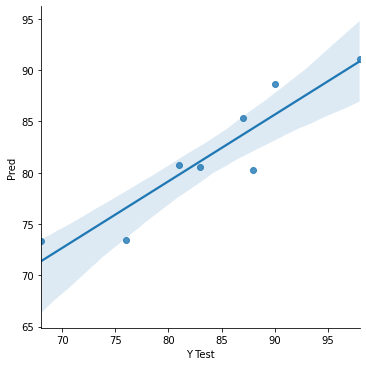

In [61]:
res=pd.DataFrame()
res['Actual']=test_y
pred_lr=LassoR.predict(test_x)

data = pd.DataFrame({'Y Test':test_y , 'Pred':pred_lr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()